# Convert NWB files to pandas Dataframes

In [1]:
# general python modules for scientific analysis
import sys, pathlib, os
import numpy as np

# add the python path:
sys.path.append('../../src')
from physion.analysis.dataframe import NWB_to_dataframe
from physion.utils import plot_tools as pt

In [ ]:
filename = os.path.join(os.path.expanduser('~'), 'CURATED' , 'NDNF-December-2022', '2022_12_14-13-27-41.nwb')
data = NWB_to_dataframe(filename,
                        visual_stim_label='per-protocol',
                        #visual_stim_label='per-protocol-and-parameters',
                        #visual_stim_label='per-protocol-and-parameters-and-timepoints', #
                        subsampling = 10,
                        verbose=False)

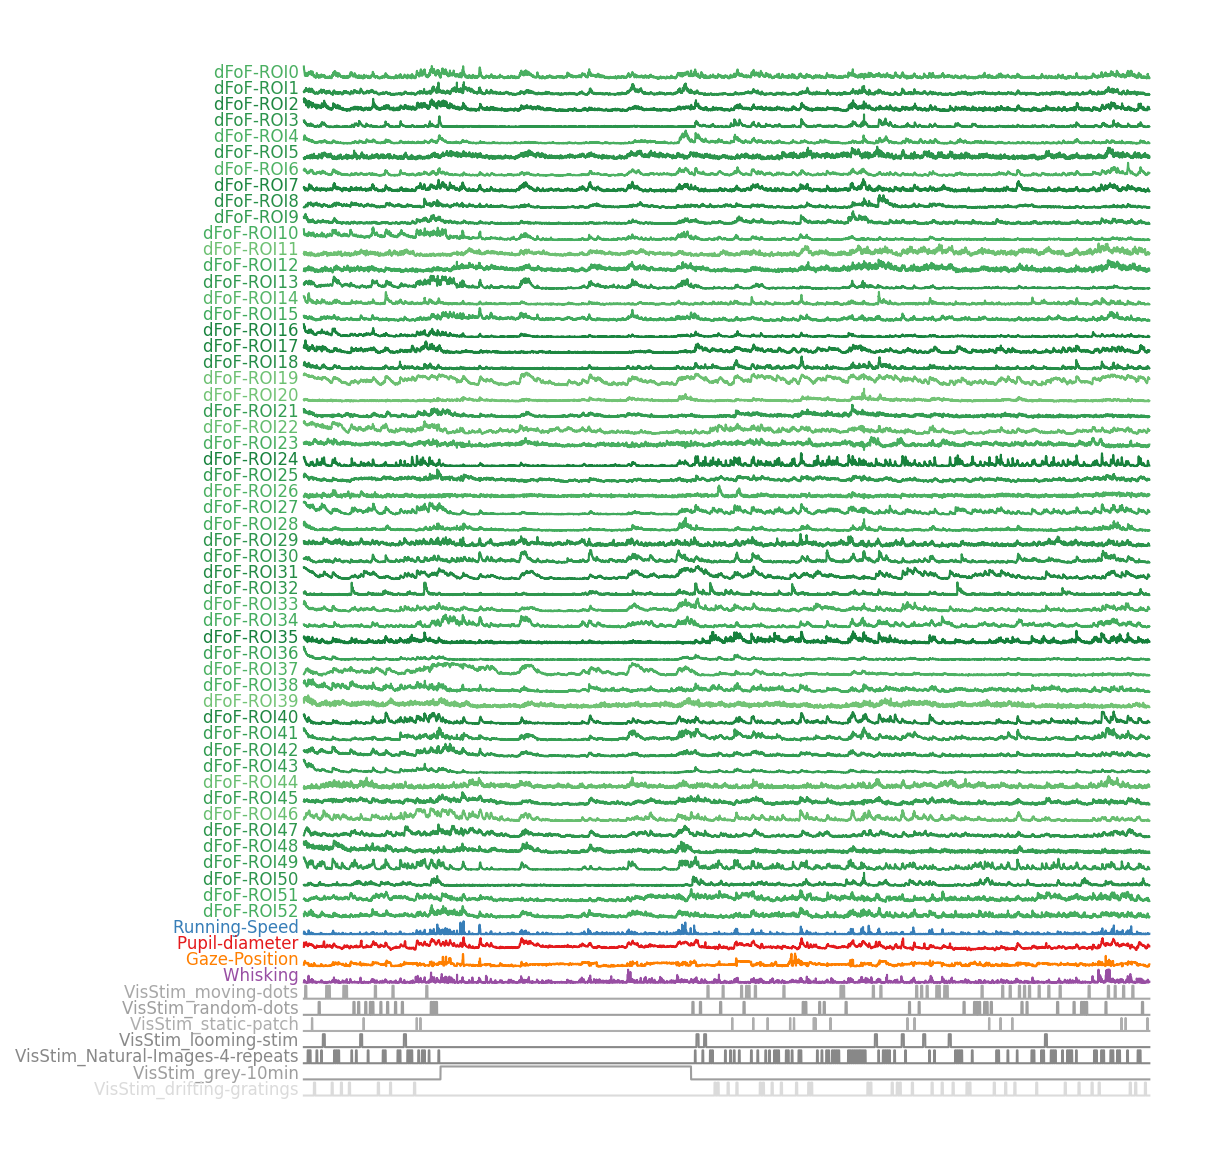

In [8]:
def min_max(array):
    return (array-array.min())/(array.max()-array.min())

def color(key):
    if 'Pupil' in key:
        return pt.plt.cm.Set1(0)
    elif 'Gaze' in key:
        return pt.plt.cm.Set1(4)
    elif 'Running' in key:
        return pt.plt.cm.Set1(1)
    elif 'Whisking' in key:
        return pt.plt.cm.Set1(3)
    elif 'VisStim' in key:
        return pt.plt.cm.Greys(np.random.uniform(0.2, .6))
    else:
        return pt.plt.cm.Greens(np.random.uniform(0.5, .8))
    
fig, ax = pt.plt.subplots(figsize=(8,10))
i = 0
for key in data.keys():
    if key !='time':
        c = color(key)
        ax.plot(data['time'], -i+.8*min_max(data[key].astype(float)), color=c, lw=1) # convert bool to float when needed
        ax.annotate(key+' ', (0, -i+.1), ha='right', color=c)
        i+=1
                
ax.axis('off');